#  MODELO CLASIFICACION XGBOOST 


Presentamos e Importamos todas las librerias que vamos a necesitar a lo largo del modelo.

In [1]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier

Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y el nombre de las Columnas / variables que la componen. Las variables que se refierne a unidades de negocio no las vamos a utilizar en el modelo por lo que las transformamos a Objeto para un mejor entendimiento y segmentacion de las propias variables. 

In [2]:
# CAMBIAR SEGUN RUTA LOCAL HASTA UBICACION DEL REPOSITORIO
ruta = '/Users/manue/TFM'

In [3]:
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [4]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,TUTELA,28332.0,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475.0,ASESORAMIENTO FINANCIERO,14204.0,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000.0,ASESORAMIENTO FINANCIERO,14219.0,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [5]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## Primera aproximacion al modelo

In [6]:
# Seleccionamo variables numericas
df = df.select_dtypes('number')

In [7]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 8576106 (451374, 19)
Datos y = 451374 (451374,)


In [8]:
# Instanciamos Clasificador
clfXGBoost_first_aproach = XGBClassifier()

In [9]:
# Entrenamos el modelo
clfXGBoost_first_aproach.fit(X,y)

C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
# Predicciones
clfXGBoost_first_aproach.predict(X)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
# Dividimos nuestro Data Set en Set de Train y Set de Test. Asignamos 80% al set de Train y 20%  asl set de Test
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [12]:
# Entrenamos el modelo
clfXGBoost_first_aproach.fit(X_train,y_train)

[13:30:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
# Sacamos las probabilidades de tener seguro de hogar
clfXGBoost_first_aproach.predict_proba(X_test)[:, 1]

array([0.00734196, 0.41358268, 0.43320242, ..., 0.08270034, 0.5148063 ,
       0.07456124], dtype=float32)

In [14]:
print('== Resultados Primera aproximacion modelo XGBOOST ==')
print ('accuracy_score = ', accuracy_score(y_test,clfXGBoost_first_aproach.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfXGBoost_first_aproach.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfXGBoost_first_aproach.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfXGBoost_first_aproach.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfXGBoost_first_aproach.predict_proba(X_test)[:, 1]))
print('====================================')


== Resultados Primera aproximacion modelo XGBOOST ==
accuracy_score =  0.8747050678482415
precision = 0.5657602663706992
recall = 0.17301654645736106
f1_score = 0.26499447657417635
roc_auc_score = 0.8423034035558632


Sin entrenar: ROC AUC=0.500
XGBOOST: ROC AUC=0.842


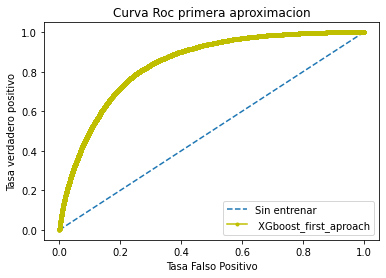

In [15]:
# Ploteamos Curva Roc
#Generamos un clasificador sin entrenar , que asignará 0 a todo
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfXGBoost_first_aproach.predict_proba(X_test)[:, 1])
# Print
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('XGBOOST: ROC AUC=%.3f' % (lr_auc))
# calculamos Curva ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfXGBoost_first_aproach.predict_proba(X_test)[:, 1])
# Plot
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' XGboost_first_aproach' , color = "y")
# Axes labels
pyplot.title('Curva Roc primera aproximacion')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa verdadero positivo')
pyplot.legend()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/XGBOOST Model - Roc Curve First Aproach.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## Construccion del Modelo

In [16]:
# Read Data Frame 
df_normalized = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalized.csv')

In [17]:
# Inputs y Target 
X = df_normalized.drop(['lp_seg_hogar'], axis = 1)
y= df_normalized['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6684992 (417812, 16)
Datos y = 417812 (417812,)


In [18]:
# Instanciamos Clasificador
clfXGBoost = XGBClassifier()

In [19]:
# Dividimos nuestro Data Set en Set de Train y Set de Test. Asignamos 80% al set de Train y 20%  asl set de Test
test_size = 0.2
seed = 47
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [20]:
# Entrenamos el modelo
clfXGBoost.fit(X_train, y_train)

C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
# Predicciones
clfXGBoost.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
# Probabilidades de tener seguro de hogar
clfXGBoost.predict_proba(X_test)[:, 1]

array([0.07424898, 0.16164492, 0.00200887, ..., 0.01031027, 0.00168153,
       0.01335691], dtype=float32)

Primeros resultados. Tomamos como muestra la métrica recall. Los resultados obtenidos en Train son muy cercanos a los obtenidos en test. Nuestro modelo entrenado está generalizando bien y podemos considerarlo como bueno por el momento, a la espera de mejores métricas. En caso de que hubiera una gran diferencia podría estar indicando un exceso de ajuste. Confirmamos que generaliza bien con la Validación Cruzada


In [23]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfXGBoost.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))

===========RECALL TRAIN============
recall = 0.3694670873871505
===========RECALL TEST=============
recall = 0.34970341939986044


## Técnicas de validación cruzada.  Métricas: Validación cruzada
Utilizamos la validación cruzada iterando 5 veces a lo largo del conjunto de entrenamiento.

- Apartamos 1/5 muestras.
- Entrenamos el modelo con las 4/5 muestras restantes.
- Mediremos con diferentes métricas el resultado obtenido en las muestras apartadas.
- Esto significa que hacemos 5 entrenamientos independientes.
- El resultado será la media de las 5 métricas anteriores.

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfXGBoost,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfXGBoost,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfXGBoost,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:34:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(0.7101162982151441, 0.3456042031523643, 0.4643222243640205)

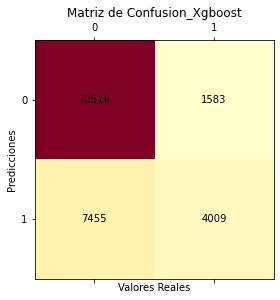

In [25]:
# Plot 
matriz_confusion_clfXGBoost = confusion_matrix(y_test,clfXGBoost.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(matriz_confusion_clfXGBoost, cmap=plt.cm.YlOrRd)
for i in range(matriz_confusion_clfXGBoost.shape[0]):
    for j in range(matriz_confusion_clfXGBoost.shape[1]):
        ax.text(x=j, y=i, s=matriz_confusion_clfXGBoost[i, j], va='center', ha='center')

plt.title('Matriz de Confusion_Xgboost')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.tight_layout()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/KNN Model - Confusion_matrix_XGboost.png', dpi=75,bbox_inches='tight')
plt.show()


In [26]:
print('========= Resultados clfXGBoost================')
print ('accuracy_score = ', accuracy_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfXGBoost.predict_proba(X_test)[:, 1]))
print('====================================')


========= Resultados clfXGBoost================
accuracy_score =  0.8918420832186494
precision = 0.7169170243204578
recall = 0.34970341939986044
f1_score = 0.4700984990619137
roc_auc_score = 0.8929102371519149


## GridSearchCV  

Evaluamos y seleccionamos de forma sistemática los parámetros de un modelo. Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los segundos mediante validación cruzada.

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
XGBClassifier() 

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [29]:
# Buscamos los mejores parametros con GS
XGBoost_params = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

XGBoostgs = GridSearchCV(
        clfXGBoost,
        XGBoost_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )


In [30]:
#Entrenamos
XGBoostgs.fit(X_train,y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 51.7min finished
C:\Users\manue\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:27:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [31]:
# Mejores estimadores
XGBoostgs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
# Mejores Parametros
XGBoostgs.best_params_

{'colsample_bytree': 0.8,
 'gamma': 2,
 'max_depth': 5,
 'min_child_weight': 10,
 'subsample': 1.0}

## Hacemos el modelo con los mejores parametros

In [33]:
clfXGBoost = XGBClassifier(colsample_bytree = 1.0,
 gamma = 2,
 max_depth = 5,
 min_child_weight = 1,
 subsample= 0.8)

In [34]:
clfXGBoost.fit(X_train, y_train)

[14:27:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
clfXGBoost.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
clfXGBoost.predict_proba(X_test)[:, 1]

array([0.08147623, 0.1447347 , 0.0025267 , ..., 0.01065258, 0.00146256,
       0.01288174], dtype=float32)

In [37]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfXGBoost.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))

===========RECALL TRAIN============
recall = 0.3541283197475677
===========RECALL TEST=============
recall = 0.3413293789253315


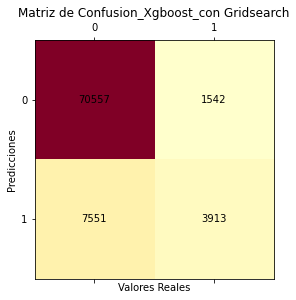

In [38]:
# Plot 
matriz_confusion_clfXGBoost = confusion_matrix(y_test,clfXGBoost.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(matriz_confusion_clfXGBoost, cmap=plt.cm.YlOrRd)
for i in range(matriz_confusion_clfXGBoost.shape[0]):
    for j in range(matriz_confusion_clfXGBoost.shape[1]):
        ax.text(x=j, y=i, s=matriz_confusion_clfXGBoost[i, j], va='center', ha='center')

plt.title('Matriz de Confusion_Xgboost_con Gridsearch')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.tight_layout()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/KNN Model - Confusion_matrix_XGboost_grid.png', dpi=75,bbox_inches='tight')
plt.show()

[[70557  1542]
 [ 7551  3913]]


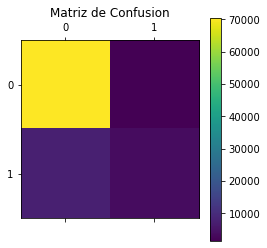

In [39]:
matriz_confusion_clfXGBoost = confusion_matrix(y_test,clfXGBoost.predict(X_test))
print(matriz_confusion_clfXGBoost)
pl.matshow(confusion_matrix(y_test,clfXGBoost.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [40]:
print('========= Restulados XGBoost con Gridsearch================')
print ('accuracy_score = ', accuracy_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfXGBoost.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfXGBoost.predict_proba(X_test)[:, 1]))
print('====================================')
#print('classification_report')
#print(classification_report(y_test, clfknn.predict(X_test)))3c445ddeb657

========= Restulados XGBoost con Gridsearch================
accuracy_score =  0.8911838971793736
precision = 0.7173235563703024
recall = 0.3413293789253315
f1_score = 0.4625568887050062
roc_auc_score = 0.8923245156135482


## Curva Roc

Sin entrenar: ROC AUC=0.500
clfXGBoost: ROC AUC=0.892


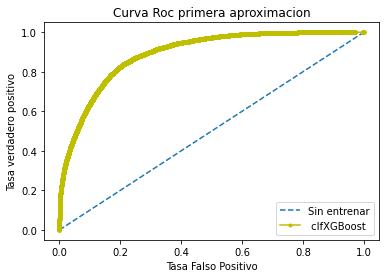

In [41]:
# Ploteamos Curva Roc
#Generamos un clasificador sin entrenar , que asignará 0 a todo
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfXGBoost.predict_proba(X_test)[:, 1])
# Print
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('clfXGBoost: ROC AUC=%.3f' % (lr_auc))
# calculamos Curva ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfXGBoost.predict_proba(X_test)[:, 1])
# Plot
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfXGBoost' , color = "y")
# Axes labels
pyplot.title('Curva Roc primera aproximacion')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa verdadero positivo')
pyplot.legend()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/XGBOOST Model - Roc Curve xgboost con grid.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## *** Conclusiones Modelo ***

- __La metrica elegida__ en el Modelo de clasificacion XGBoost para decidir si estamos ante un buen resultado es __Metrica Recall y AUC - Curva Roc.__ 
- Iniciamos nuestro modelo con una __primera aproximacion__ obteniendo unos resultados __muy mejorables. Recall 0,17.__ La base de datos utilizada es la original sin haber realizado ningun preprocesado. 
- Continuamos evolucionando nuestro modelo. Utilizamos la base de datos normalizada sin PCA.  Bases de datos  preprocesada en nuestro bloque de preprocessing donde hemos adaptado, aplicado Label Encoder, Standar Scalery  Normalizado variables.  
- __Confirmamos que nuestro set de entramiento ha generalizado bien al no haber mucha diferencia entre los resultados obtenidos de Test y Train. Test 0.39 Train 0.37 . Podemos descartar overfiting__ Comprobamos mediante Cross Validation obteniendo medias de distintas metricas.

- Necesitamos mejorar el modelo y para ello utilizamos GridSearch para buscar soluciones y mejores parametros. Una vez obtenidos, entrenamos de nuevo y sacamos nuevamente metricas Recall 0.35 Train - 0.34 
- __Las metricas finales son :  Recall 0.34 - Auc 0.89__
- Dadas las metricas obtenidas consideramos que no es el mejor modelo para nuestro objetivo.
